### Modeller
Baselines vi skal have med:
- Random choose candidates from df
- Mergesort choose candidates from df
- Mergesort hardcoded to account for gender
- Plain RankNet

Fair model:
- RankNet account for diversity 

In [31]:
#Load packages
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import random

In [120]:
#plots setup
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (14,5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

### DF

In [142]:
#Start here and load the dataframe
df = pd.read_csv("df_sum_score.csv")
df = df[df.STRATUM != "0"] #0 corresponds to nan, i.e. removing nans
df["strat_new"] = df.STRATUM.apply(lambda x: x.replace(" ", "_"))

#### Average score generation

In [143]:
df["HI_GRADE_AVG"] = df[["CR_S11", "CC_S11", "ENG_S11"]].mean(axis=1)
df["COL_GRADE_AVG"] = df[["CR_PRO", "CC_PRO", "ENG_PRO"]].mean(axis=1)

#### Mergesort

In [144]:
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

In [145]:
#Top 100
df_sort[:100]

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,6145,M,Stratum 4,71,91,95,100,100,99,99.666667,85.666667,0,Stratum_4
6269,6269,M,Stratum 1,100,67,90,100,96,99,98.333333,85.666667,0,Stratum_1
8041,8041,M,Stratum 3,82,90,85,100,99,96,98.333333,85.666667,0,Stratum_3
8352,8352,M,Stratum 6,75,82,100,42,2,94,46.000000,85.666667,0,Stratum_6


#### Random Sort

In [146]:
df_random = df.sample(n = 100, random_state=2)

In [147]:
df_random

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
10027,10027,M,Stratum 4,55,60,50,47,37,17,33.666667,55.000000,0,Stratum_4
11999,11999,M,Stratum 5,63,62,75,72,53,91,72.000000,66.666667,0,Stratum_5
3874,3874,M,Stratum 2,49,62,48,27,44,43,38.000000,53.000000,0,Stratum_2
3456,3456,M,Stratum 2,53,64,50,53,58,27,46.000000,55.666667,0,Stratum_2
10147,10147,M,Stratum 4,74,77,90,84,76,96,85.333333,80.333333,0,Stratum_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1558,F,Stratum 2,55,51,38,23,57,66,48.666667,48.000000,1,Stratum_2
1554,1554,M,Stratum 2,44,45,57,61,41,63,55.000000,48.666667,0,Stratum_2
2773,2773,F,Stratum 4,64,69,55,98,92,89,93.000000,62.666667,1,Stratum_4
6341,6341,M,Stratum 2,43,49,46,27,29,50,35.333333,46.000000,0,Stratum_2


#### Merge sort for Female df and Male df and append and sort

In [148]:
def gender_mergesort(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER == "M"]
    df_F = df_temp[df_temp.GENDER == "F"]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        
gender_mergesort(df)




,level_0,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new
0,0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4
1,0,4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3
2,1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5
3,1,7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5
4,2,5673,5673,F,Stratum 5,100,82,100,98,87,98,94.333333,94.000000,1,Stratum_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,5198,5198,F,Stratum 2,87,73,90,96,84,92,90.666667,83.333333,1,Stratum_2
96,48,12204,12204,M,Stratum 5,84,77,100,100,98,92,96.666667,87.000000,0,Stratum_5
97,48,5877,5877,F,Stratum 2,74,91,85,98,93,3,64.666667,83.333333,1,Stratum_2
98,49,8104,8104,F,Stratum 2,86,82,82,87,96,93,92.000000,83.333333,1,Stratum_2


**Merge sort for Female df and Male df and append and sort**

In [472]:
df1 = df[:int(np.floor(len(df)/2))]

In [473]:
df2 = df[int(np.floor(len(df)/2)):]

In [478]:
def gender_mergesort_all(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER == "M"]
    df_F = df_temp[df_temp.GENDER == "F"]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        

In [479]:
gender_df = gender_mergesort_all(df)

In [502]:
len(gender_df)

12397

### Apply comments from meeting with Laura:
- Undersøg quality measures for ranking i bias bibel/søgning på nettet.
    - fx. mean average precision
    
    
- Lav to plots for at måle signifikans af de to andre baselines ift random.:
    1. plot top n grades as function of n for random baseline med error bars i form af std. og average + average af mergesort og diversity
    2. lav plot 1 af entropy som funktion af n.
    
    
- Lav random baseline med time bounded seed og kør +2000 runder. 

#### Quality measures

**Quality measure 1: mean average precision** https://towardsdatascience.com/map-mean-average-precision-might-confuse-you-5956f1bfa9e2

#### Creating random baseline and plot as function of n together with the mergesort

In [149]:
# The mergesort as function of n
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

#new df with incremeanted hi avg 
df_avg = df_sort.copy()

#check the sorted grades 
df_avg.HI_GRADE_AVG

5129     100.000000
11864     97.666667
4874      96.666667
7340      96.666667
1089      95.000000
            ...    
3588      33.666667
3741      32.333333
1157      32.000000
3015      30.333333
2012      26.000000
Name: HI_GRADE_AVG, Length: 12397, dtype: float64

In [150]:
#set the incremented hi avg as column
df_avg["incr_hi_mean"] = df_avg.HI_GRADE_AVG.expanding().mean()
df_avg["incr_col_mean"] = df_avg.COL_GRADE_AVG.expanding().mean()

#check the incremented average grades
df_avg["incr_hi_mean"] #index "2" er average af 100+97/2

5129     100.000000
11864     98.833333
4874      98.111111
7340      97.750000
1089      97.200000
            ...    
3588      61.114312
3741      61.111990
1157      61.109641
3015      61.107158
2012      61.104326
Name: incr_hi_mean, Length: 12397, dtype: float64

In [151]:
#cumsum of index to use for plot
df_avg["n_students"] = range(len(df))

In [152]:
#our new df
df_avg.head(5)

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,incr_hi_mean,incr_col_mean,n_students
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,100.000000,98.666667,0
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,98.833333,98.666667,1
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3,98.111111,98.222222,2
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5,97.750000,97.750000,3
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3,97.200000,97.600000,4


Text(0, 0.5, 'incremented average')

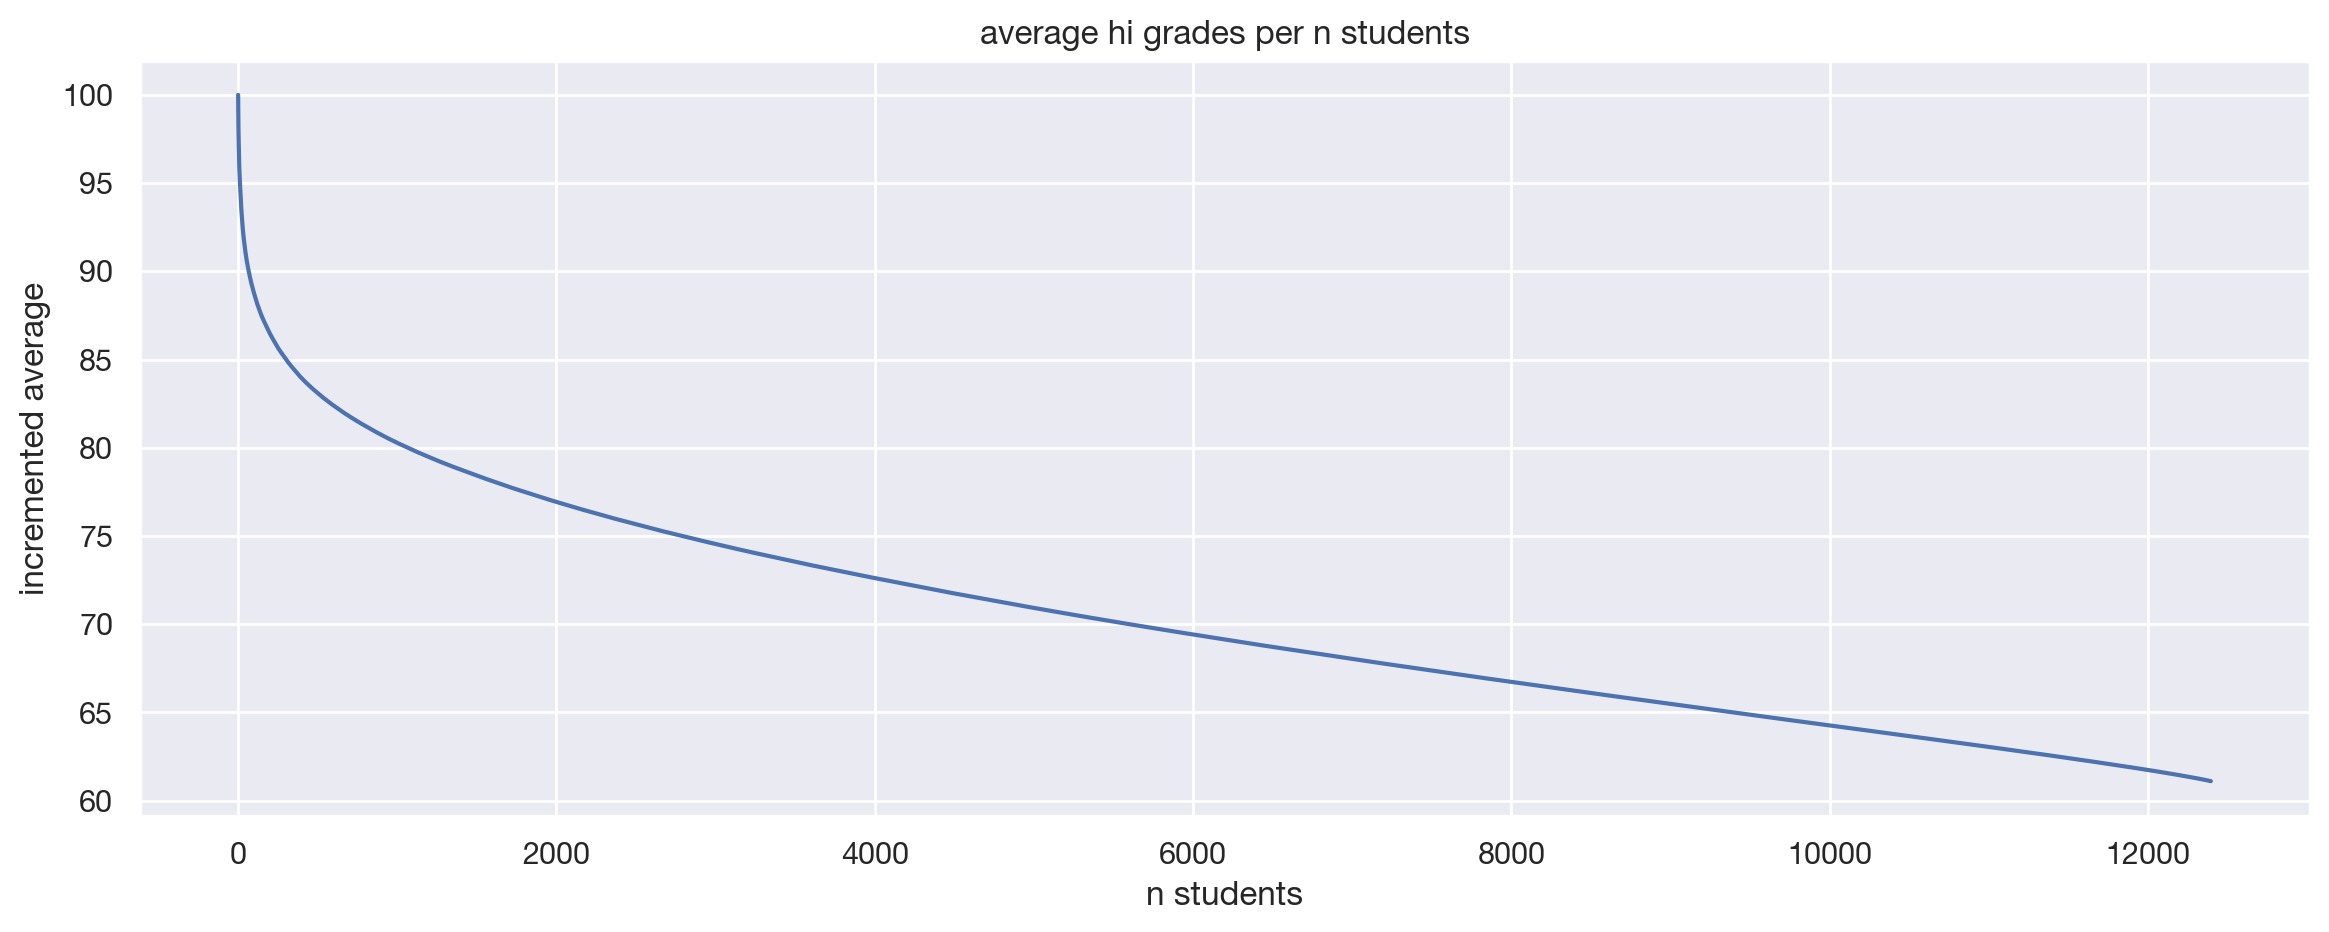

In [153]:
# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg).set_title("average hi grades per n students")
plt.xlabel('n students')
plt.ylabel('incremented average')


*Generating the random dataframes and apply same method as above*

In [ ]:
# First we check the grade distribution, to predict what we can expect
import numpy as np
sns.distplot(np.round(df_use.HI_GRADE_AVG))

In [154]:
#Random generated dfs

df_use = df[["Unnamed: 0","HI_GRADE_AVG", "GENDER_bin", "strat_new"]]

for j in range(1,2): #first make one random df that we can append the other random dfs to
    gen_state = random.seed(a=None) #random generator
    df_random1 = shuffle(df_use, random_state=gen_state) #shuffle the df with a random generator based on time
    df_random1["incr_hi_mean"] = df_random1.HI_GRADE_AVG.expanding().mean()
    df_random1["n_students"] = range(len(df_random1))
    for i in range(1000):
        gen_state = random.seed(a=None)
        df_random2 = shuffle(df_use, random_state=gen_state)
        df_random2["incr_hi_mean"] = df_random2.HI_GRADE_AVG.expanding().mean()
        df_random2["n_students"] = range(len(df_random2))
        df_random1 = df_random1.append(df_random2)

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/2195774326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random1["incr_hi_mean"] = df_random1.HI_GRADE_AVG.expanding().mean()
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/2195774326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random1["n_students"] = range(len(df_random1))
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/2195774326.py:13: SettingWithCopyWarning: 
A value is trying to be set o

In [155]:
#check the result of all the appended dfs:
df_random1

,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,strat_new,incr_hi_mean,n_students
559,559,66.666667,0,Stratum_3,66.666667,0
1675,1675,61.000000,0,Stratum_2,63.833333,1
5694,5694,57.666667,1,Stratum_1,61.777778,2
8116,8116,44.000000,1,Stratum_1,57.333333,3
1837,1837,63.666667,0,Stratum_2,58.600000,4
...,...,...,...,...,...,...
2102,2102,56.333333,0,Stratum_2,61.104279,12392
6054,6054,47.000000,0,Stratum_2,61.103141,12393
4761,4761,68.000000,1,Stratum_3,61.103698,12394
81,81,63.000000,0,Stratum_4,61.103851,12395


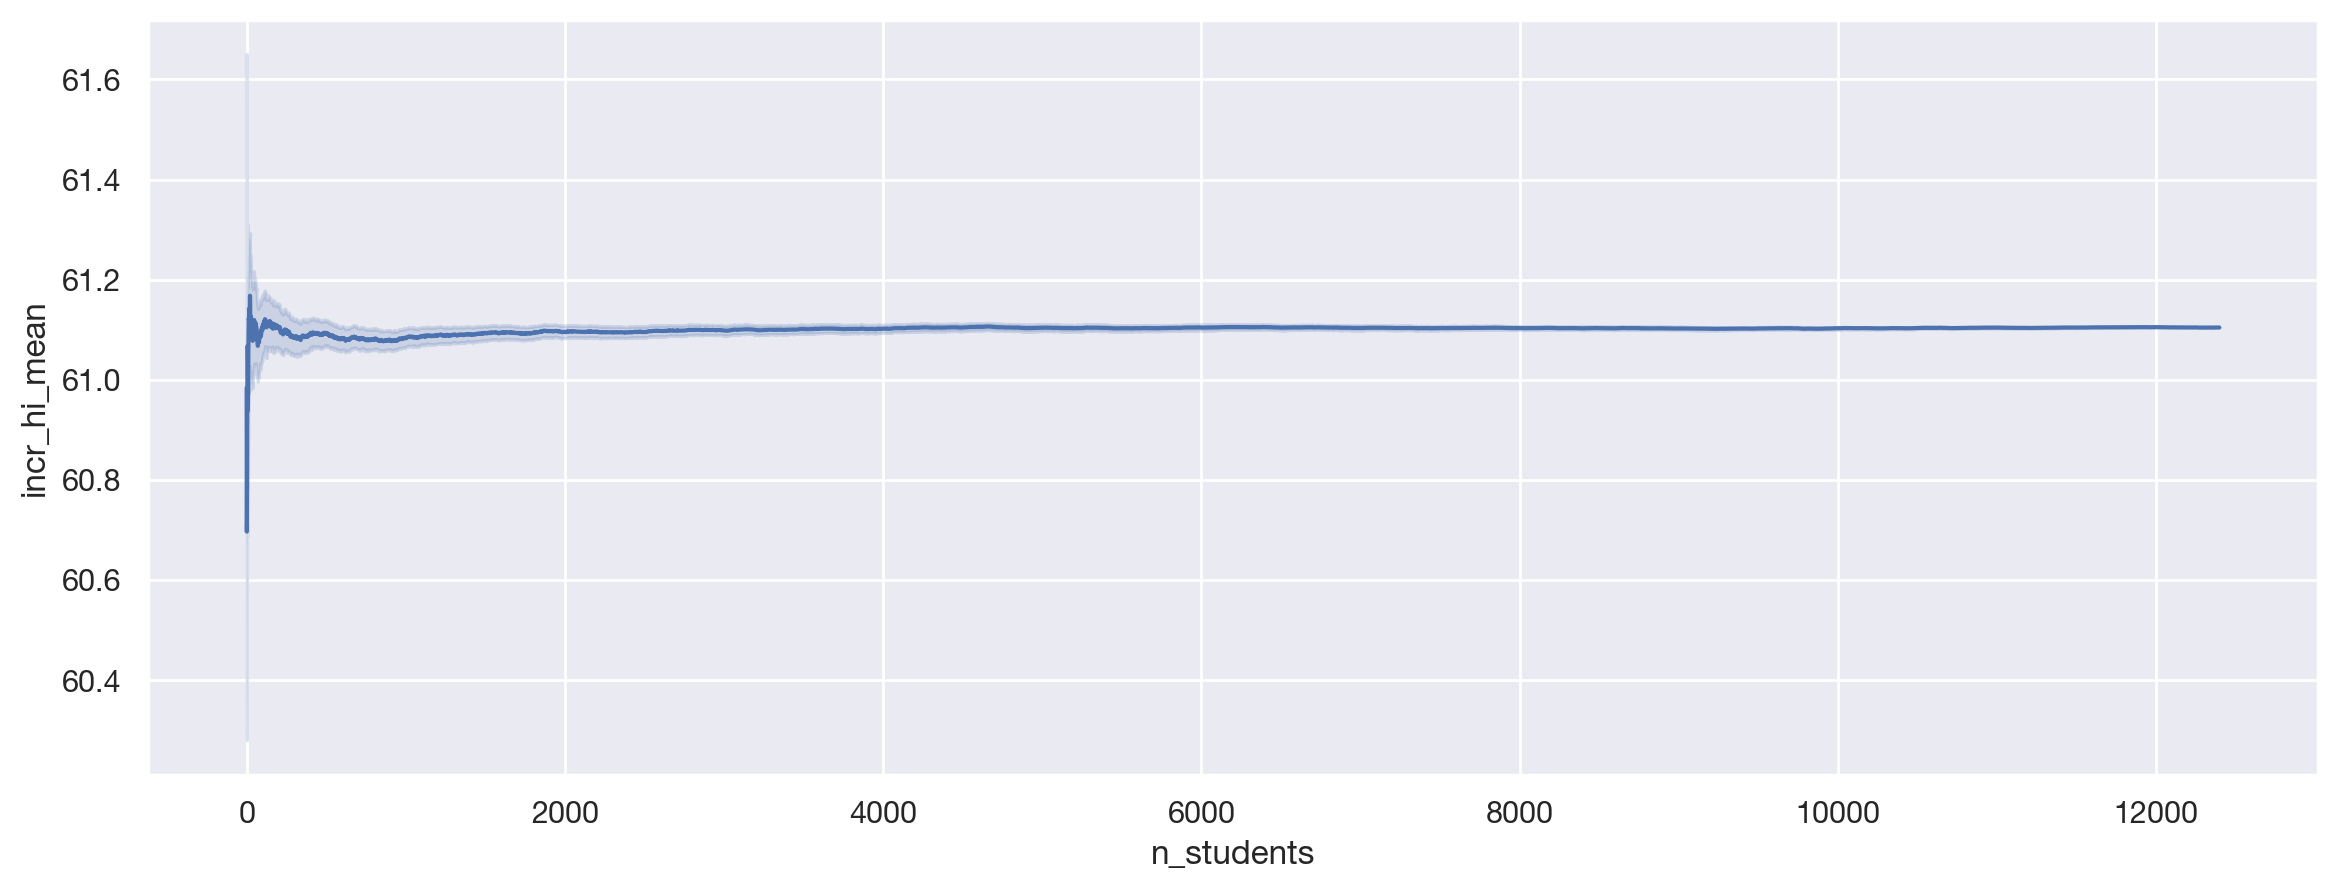

In [121]:
#First we plot the random grades per n students
# w 2000 samples

sns.lineplot(data=df_random1, x="n_students", y="incr_hi_mean")
plt.show()

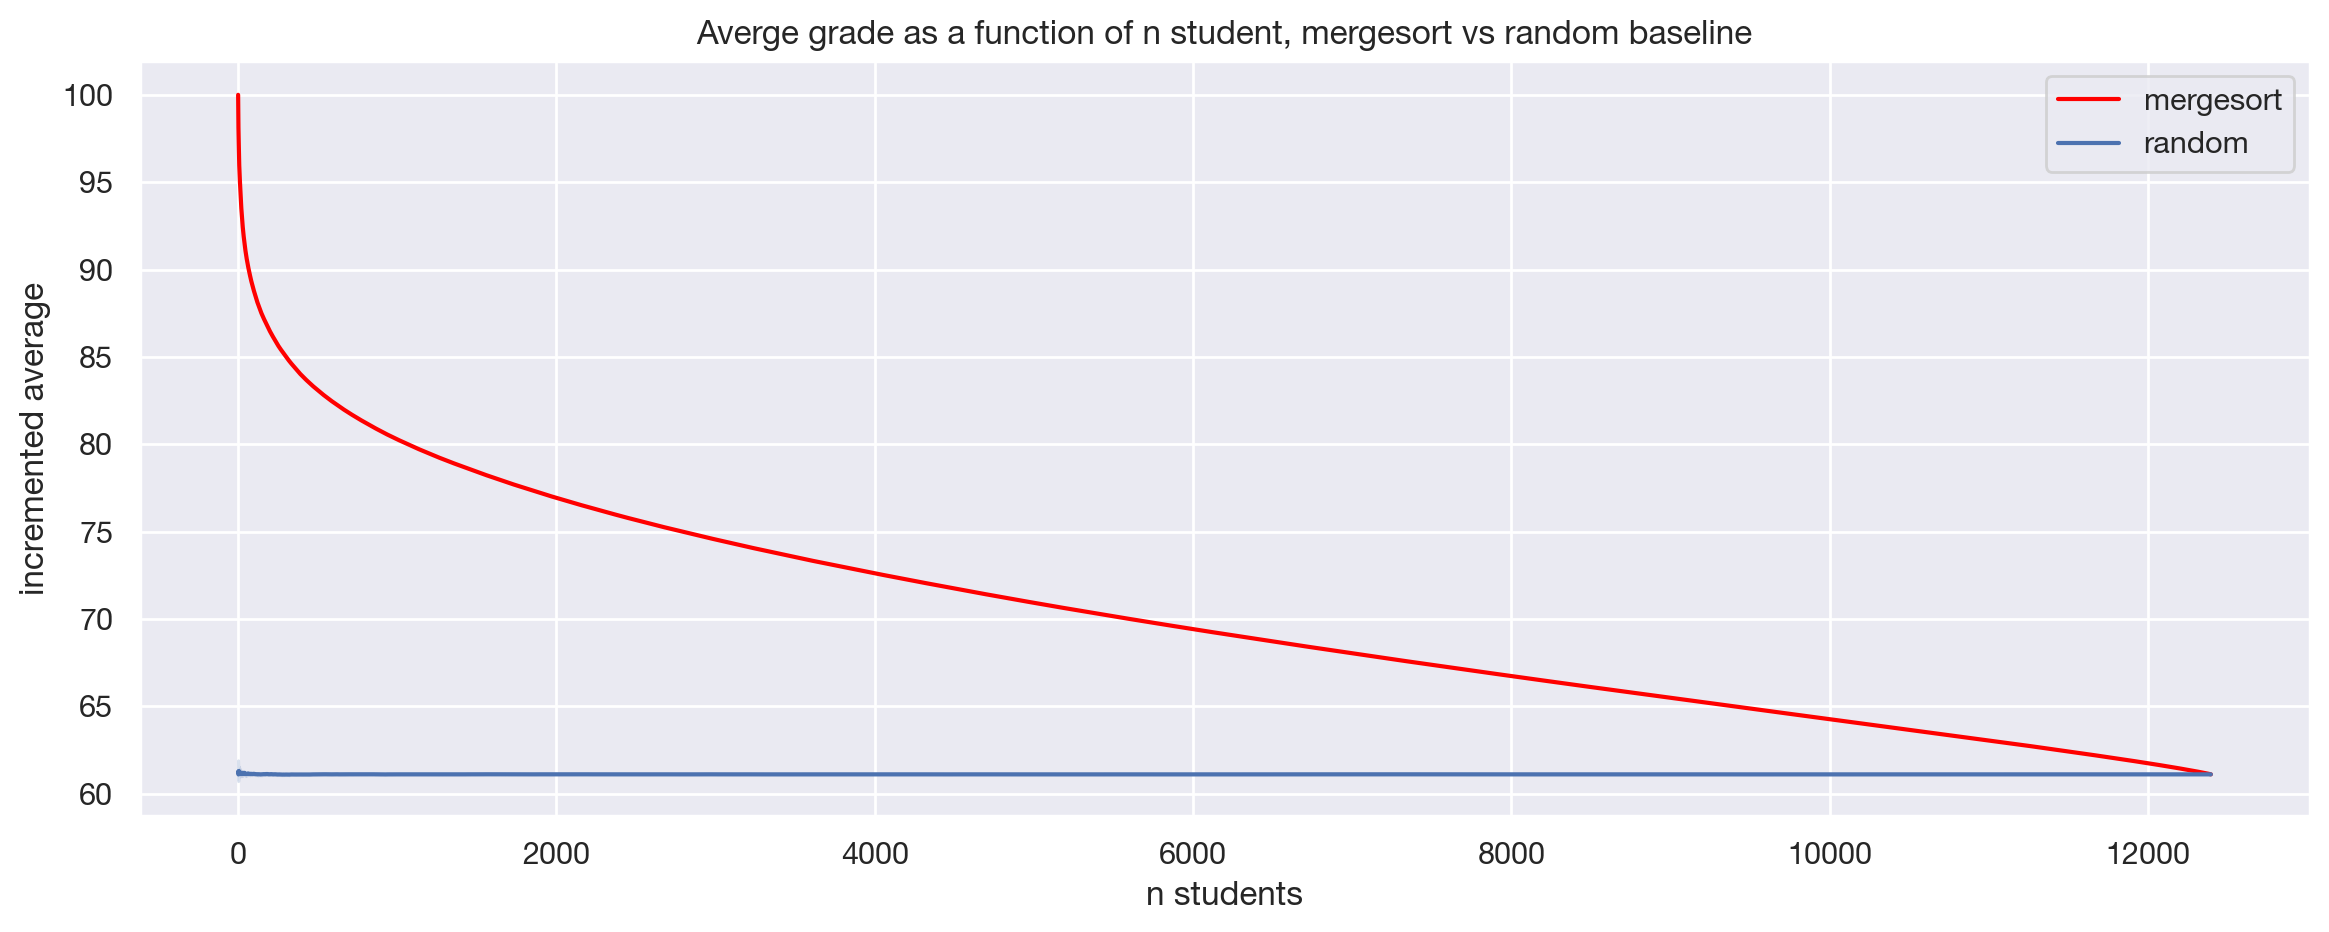

In [156]:
# Finally we plot the random grades per n students together with the mergesort grades per n students

sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg, color='red')
sns.lineplot(data=df_random1, x="n_students", y="incr_hi_mean")
plt.xlabel('n students')
plt.ylabel('incremented average')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "random"], loc ="upper right")
plt.show()

# OBS SKAL ÆNDRES brug logk og ikke log2 til sg_pair

(https://stats.stackexchange.com/questions/95261/why-am-i-getting-information-entropy-greater-than-1)

### Plot 1 as entropy of n, used to measure *diversity*. https://en.wikipedia.org/wiki/Diversity_index, https://arxiv.org/ftp/arxiv/papers/0810/0810.3525.pdf

In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Entropy for mergesort df** 


$p_{i}$ is the number of stratum-gender pair *i* divided by the total number of all stratum-gender pairs (len of df). 

We'll make a new column with the stratum-gender pair $p_{i}$. e.g. For stratum_1 gender_bin 0, startum-gender par will be 1_0. 


In [529]:
df_sort.head(5)

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,sg_pair,value_counts_col,entropy_col
5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,4_1,[[1.0]],2.284703
11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,5_1,"[[0.5, 0.5]]",2.205513
4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3,3_0,"[[0.3333333333333333, 0.3333333333333333, 0.33...",2.263207
7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5,5_0,"[[0.25, 0.25, 0.25, 0.25]]",2.261163
1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3,3_0,"[[0.4, 0.2, 0.2, 0.2]]",2.297284


In [530]:
df_sort = df_sort.reset_index()

In [531]:
df_sort.head(5)

,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,sg_pair,value_counts_col,entropy_col
0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,4_1,[[1.0]],2.284703
1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,5_1,"[[0.5, 0.5]]",2.205513
2,4874,4874,M,Stratum 3,100,90,100,98,95,99,97.333333,96.666667,0,Stratum_3,3_0,"[[0.3333333333333333, 0.3333333333333333, 0.33...",2.263207
3,7340,7340,M,Stratum 5,95,100,95,100,89,100,96.333333,96.666667,0,Stratum_5,5_0,"[[0.25, 0.25, 0.25, 0.25]]",2.261163
4,1089,1089,M,Stratum 3,100,90,95,96,96,99,97.000000,95.000000,0,Stratum_3,3_0,"[[0.4, 0.2, 0.2, 0.2]]",2.297284


In [532]:
def sgpair_func(gen, strat):
    #combines startum number and binary gender number in a string:
    for i in range(1,7):
        if gen==1 and strat == "Stratum_{}".format(i):
            return "{}_1".format(i)
        elif gen==0 and strat == "Stratum_{}".format(i):
            return "{}_0".format(i)
        else:
            None


In [533]:
#stratum gender pair column

df_sort["sg_pair"] = df_sort.apply(lambda x: sgpair_func(x['GENDER_bin'], x['strat_new']), axis=1)

In [534]:
df_sort.head(2) #check pairs in sg_pair

,index,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin,strat_new,sg_pair,value_counts_col,entropy_col
0,5129,5129,F,Stratum 4,100,100,100,99,97,100,98.666667,100.000000,1,Stratum_4,4_1,[[1.0]],2.284703
1,11864,11864,F,Stratum 5,100,93,100,99,100,97,98.666667,97.666667,1,Stratum_5,5_1,"[[0.5, 0.5]]",2.205513


In [535]:
#get ratio of each pair by using normalize=True
values = df_sort['sg_pair'].value_counts(normalize=True)
values

2_0    0.192385
3_0    0.190611
3_1    0.135678
2_1    0.132613
1_0    0.080987
4_0    0.075663
1_1    0.056869
4_1    0.051625
5_0    0.032105
6_0    0.021941
5_1    0.018956
6_1    0.010567
Name: sg_pair, dtype: float64

In [536]:
#Check if works: convert them to arrays to use for row entry later
arrayval = np.array([values])

In [537]:
arrayval

array([[0.19238525, 0.19061063, 0.13567799, 0.13261273, 0.08098734,
        0.07566347, 0.0568686 , 0.05162539, 0.03210454, 0.02194079,
        0.0189562 , 0.01056707]])

In [538]:
#Entropy of whole df
-(arrayval*np.log(arrayval)).sum()

2.204356877039452

In [539]:
#Can also be checked as
from scipy.stats import entropy

entropy = entropy(value_counts_df)
entropy

2.204356877039452

Create column with valuecounts for each row, incremented

In [540]:
data_value_counts = []
for i in range(1,len(df_sort)+1):
    data_value_counts.append(np.array([df_sort["sg_pair"][:i].value_counts(normalize=True)]))

In [541]:
df_sort["value_counts_col"] = data_value_counts

In [595]:
df_sort[["value_counts_col", "sg_pair"]][:5] #unique pairs get incremented per row. Probabilities look correct

,value_counts_col,sg_pair
0,[[1.0]],4_1
1,"[[0.5, 0.5]]",5_1
2,"[[0.3333333333333333, 0.3333333333333333, 0.33...",3_0
3,"[[0.25, 0.25, 0.25, 0.25]]",5_0
4,"[[0.4, 0.2, 0.2, 0.2]]",3_0


Do the same for only gender

In [589]:
data_value_counts_gen = []
for i in range(1,len(df_sort)+1):
    data_value_counts_gen.append(np.array([df_sort["GENDER_bin"][:i].value_counts(normalize=True)]))

In [590]:
df_sort["value_counts_col_GENDER"] = data_value_counts_gen

In [596]:
df_sort[["value_counts_col_GENDER", "GENDER_bin"]][:5]  #unique pairs get incremented per row. Probabilities look correct

,value_counts_col_GENDER,GENDER_bin
0,[[1.0]],1
1,[[1.0]],1
2,"[[0.6666666666666666, 0.3333333333333333]]",0
3,"[[0.5, 0.5]]",0
4,"[[0.6, 0.4]]",0


Entropy for each row, sg_pair and GENDER

In [556]:
data_entropy = []
for i in range(len(df_sort)):
    data_entropy.append(-(df_sort["value_counts_col"][i]*np.log(df_sort["value_counts_col"][i])).sum())

In [557]:
df_sort["entropy_col"] = data_entropy

In [558]:
df_sort["entropy_col"]

0       -0.000000
1        0.693147
2        1.098612
3        1.386294
4        1.332179
           ...   
12392    2.204466
12393    2.204422
12394    2.204377
12395    2.204402
12396    2.204357
Name: entropy_col, Length: 12397, dtype: float64

In [603]:
data_entropy_gen = []
for i in range(len(df_sort)):
    data_entropy_gen.append(-(df_sort["value_counts_col_GENDER"][i]*np.log(df_sort["value_counts_col_GENDER"][i])).sum())

In [604]:
df_sort["entropy_col_GENDER"] = data_entropy_gen

In [605]:
df_sort["entropy_col_GENDER"]

0       -0.000000
1       -0.000000
2        0.636514
3        0.693147
4        0.673012
           ...   
12392    0.675536
12393    0.675524
12394    0.675511
12395    0.675499
12396    0.675487
Name: entropy_col_GENDER, Length: 12397, dtype: float64

Average Incremenatal entropy

In [606]:
df_sort["incr_entropy_sgpair"] = df_sort.entropy_col.expanding().mean()

In [633]:
 df_sort.entropy_col.expanding().sum()

Expanding [min_periods=1,center=False,axis=0,method=single]

In [607]:
df_sort["incr_entropy_sgpair"]

0        0.000000
1        0.346574
2        0.597253
3        0.794513
4        0.902047
           ...   
12392    2.255029
12393    2.255025
12394    2.255021
12395    2.255017
12396    2.255013
Name: incr_entropy_sgpair, Length: 12397, dtype: float64

In [609]:
df_sort["incr_entropy_GENDER"] = df_sort.entropy_col_GENDER.expanding().mean()

In [611]:
df_sort["incr_entropy_GENDER"]

0        0.000000
1        0.000000
2        0.212171
3        0.332415
4        0.400535
           ...   
12392    0.665168
12393    0.665169
12394    0.665169
12395    0.665170
12396    0.665171
Name: incr_entropy_GENDER, Length: 12397, dtype: float64

Plot the average incremental entropy as function of n

Text(0, 0.5, 'incremented average entropy')

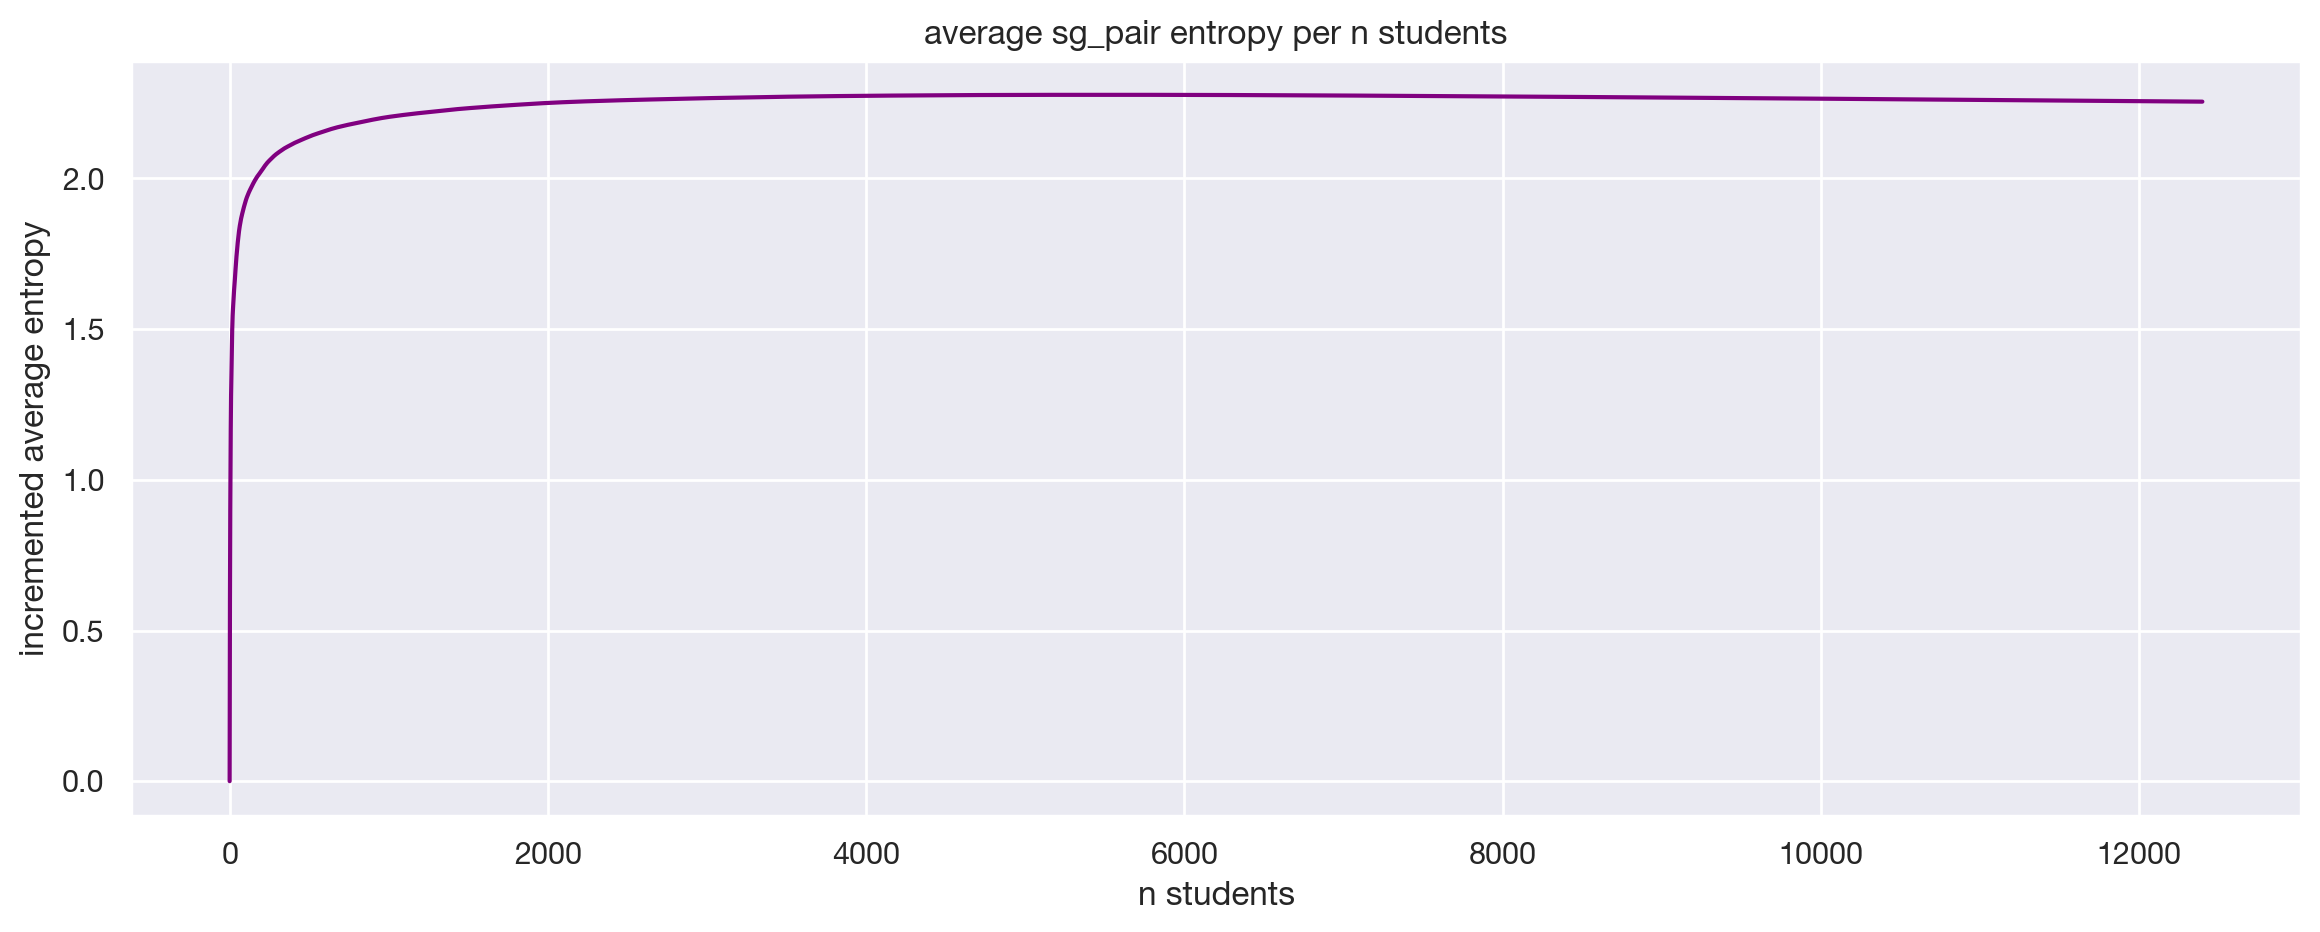

In [612]:
# Look of single lineplot of mergesort grades as function of n
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1

sns.lineplot(x="n_students", y="incr_entropy", data=df_sort, color="purple").set_title("average sg_pair entropy per n students")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')


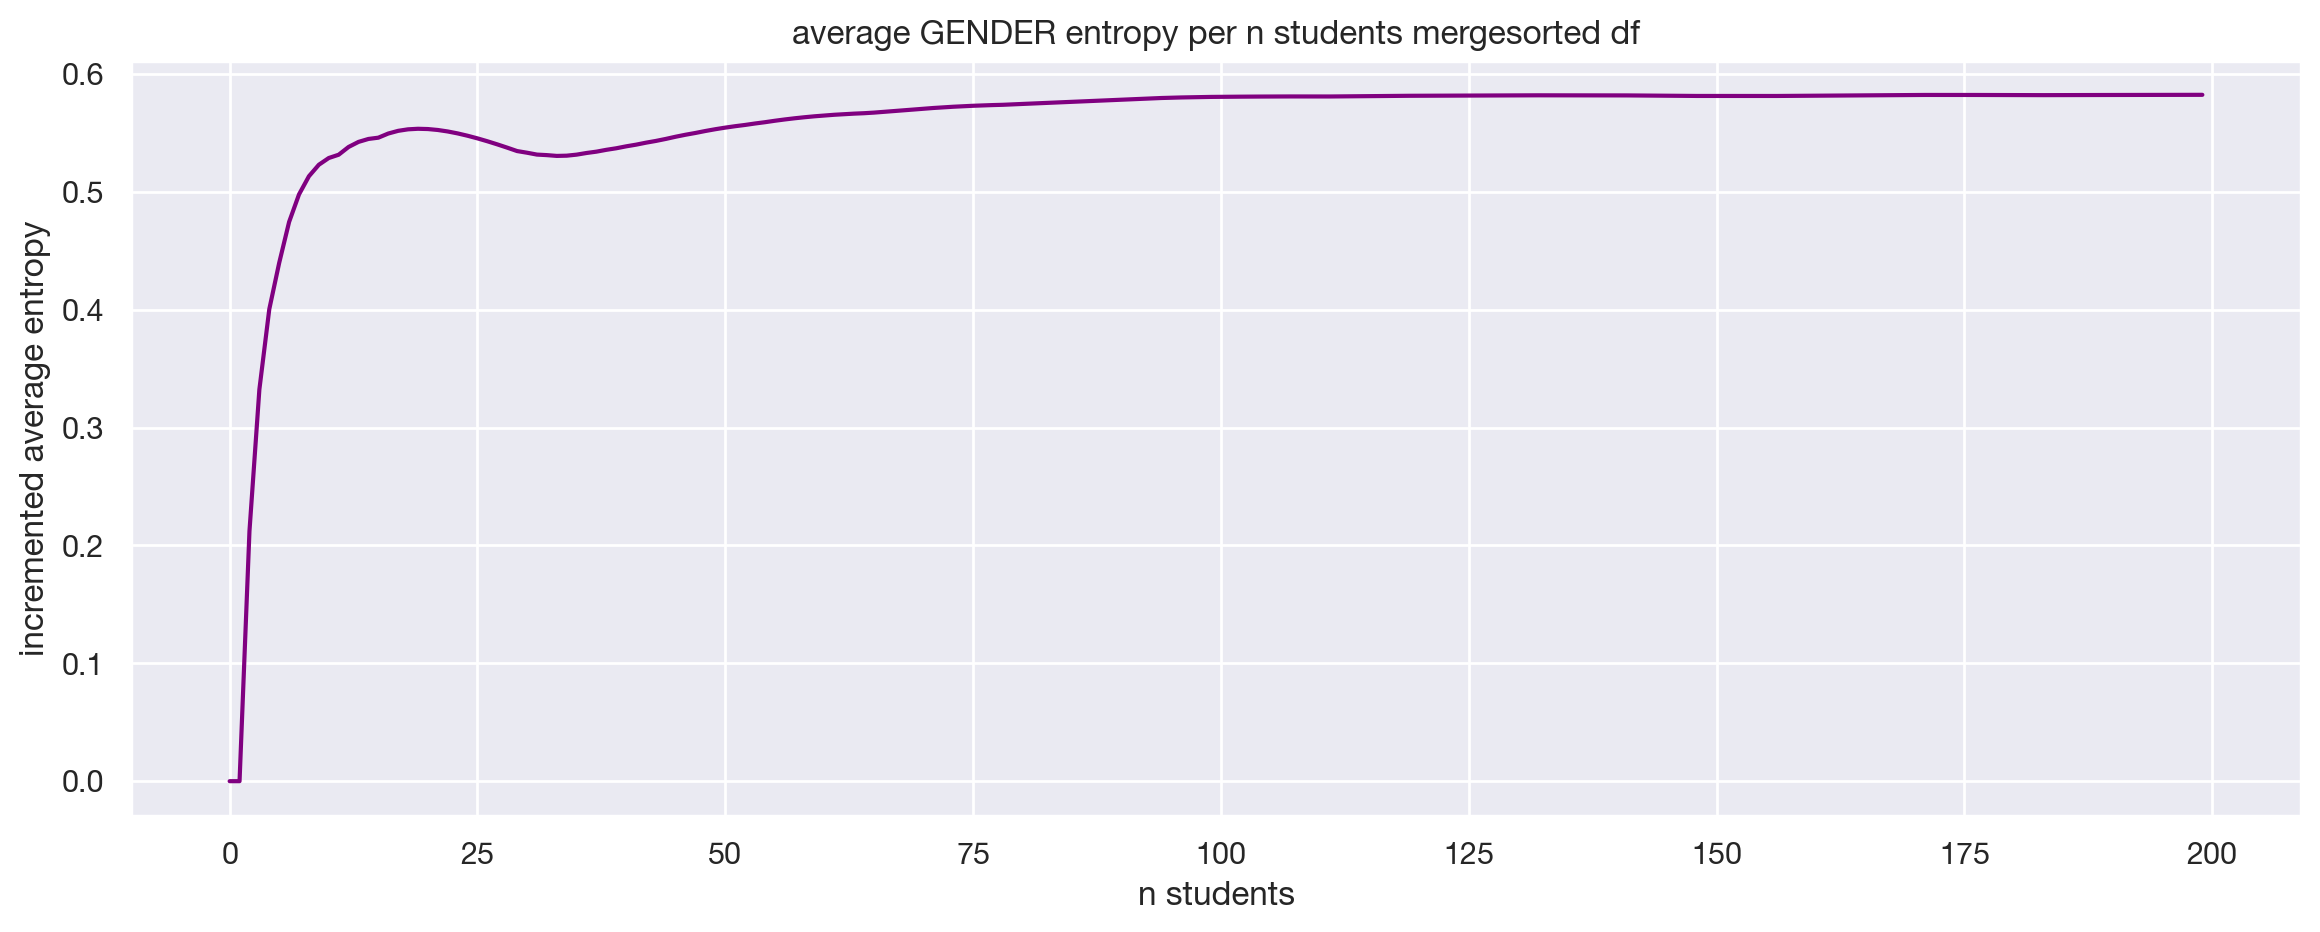

In [639]:
#Entropy Gender diversity mergesort

# Look of single lineplot of mergesort grades as function of n
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1

sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=df_sort[:200], color="purple").set_title("average GENDER entropy per n students mergesorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.show()

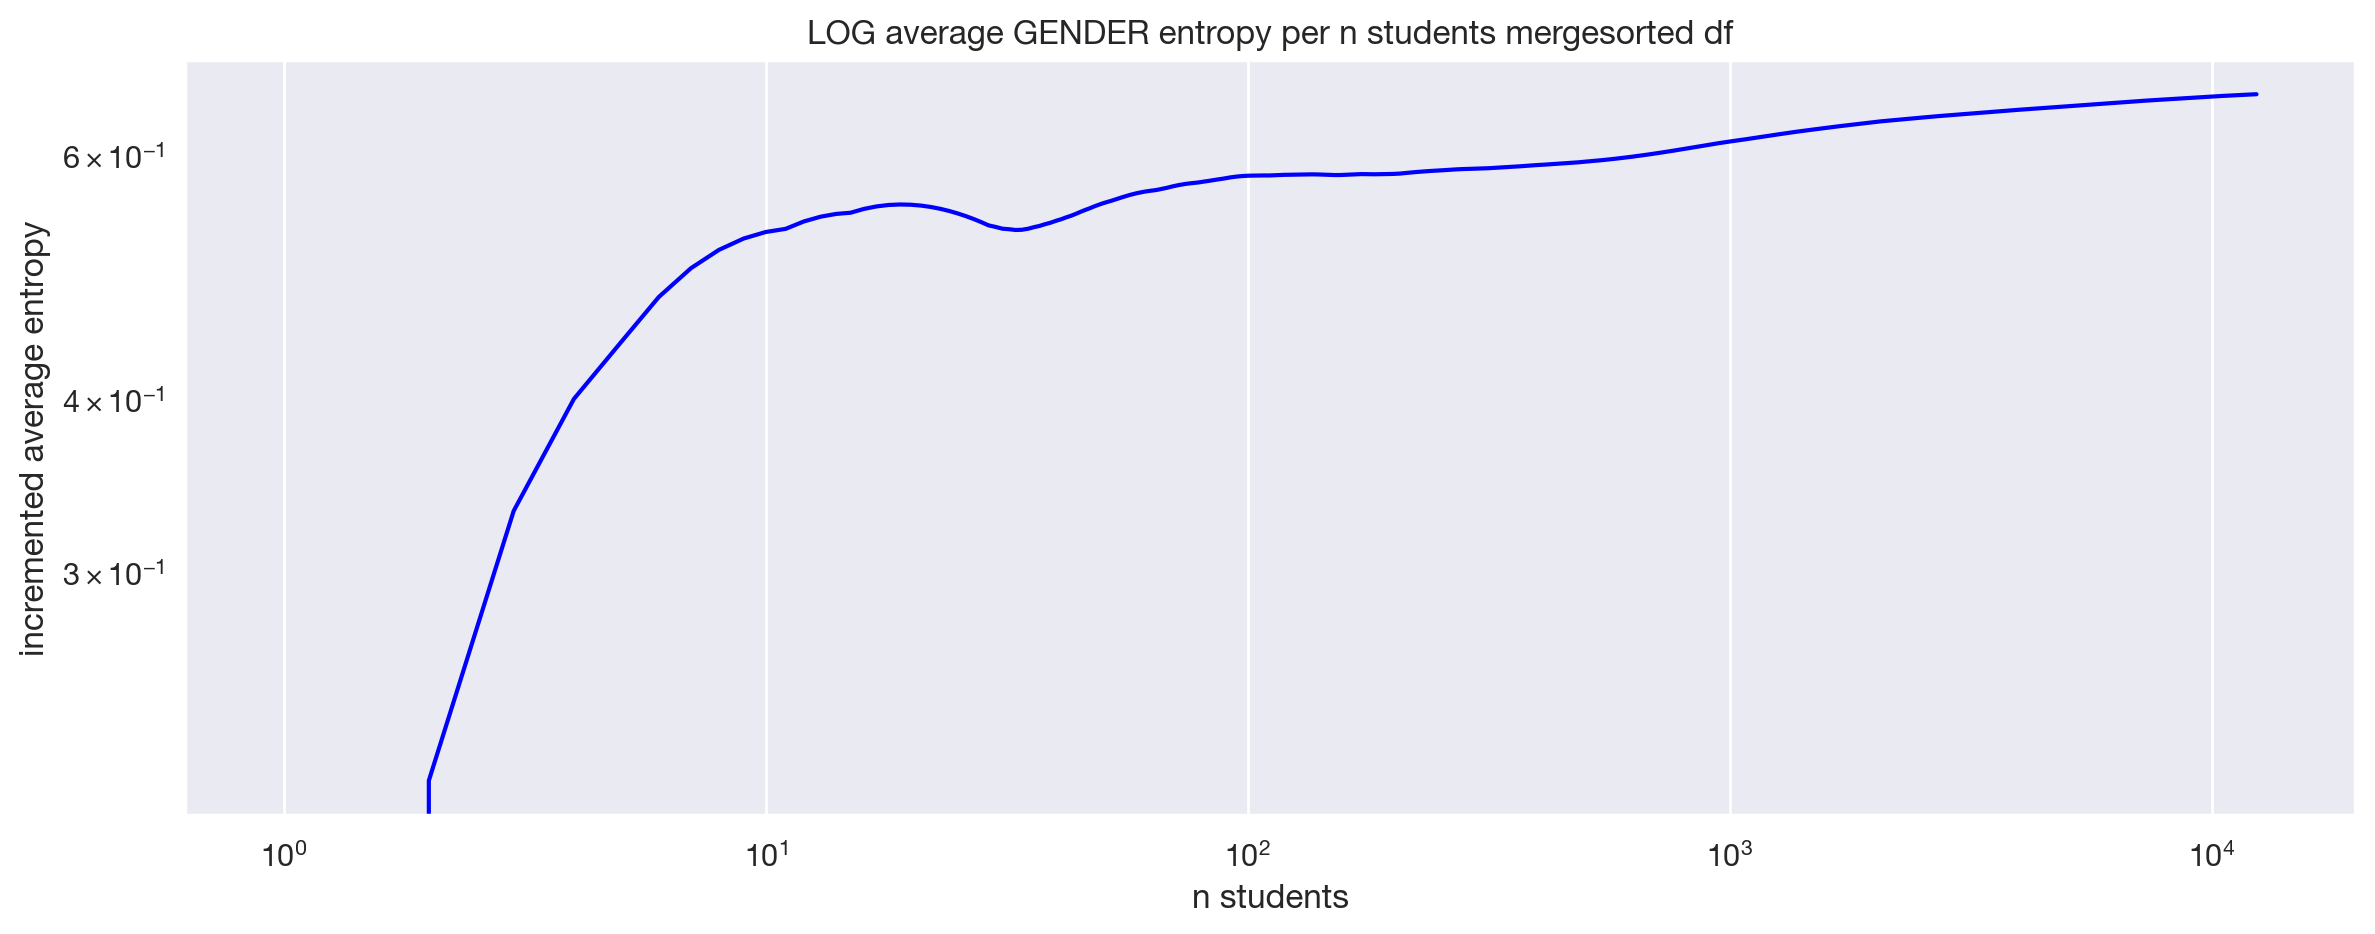

In [634]:
#LOG Entropy Gender diversity mergesort

# Look of single lineplot of mergesort grades as function of n
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1

sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=df_sort, color="blue").set_title("LOG average GENDER entropy per n students mergesorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.yscale("log") #optional
plt.xscale("log") #optional
plt.show()

**Entropy for the gender diversity sorted df**

sg_pairs

In [582]:
def sgpair_func(gen, strat):
    #combines startum number and binary gender number in a string:
    for i in range(1,7):
        if gen==1 and strat == "Stratum_{}".format(i):
            return "{}_1".format(i)
        elif gen==0 and strat == "Stratum_{}".format(i):
            return "{}_0".format(i)
        else:
            None


#stratum gender pair column

gender_df["sg_pair"] = gender_df.apply(lambda x: sgpair_func(x['GENDER_bin'], x['strat_new']), axis=1)

data_value_counts = []
for i in range(1,len(gender_df)+1):
    data_value_counts.append(np.array([gender_df["sg_pair"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col"] = data_value_counts

#Entropy for each row

data_entropy = []

for i in range(len(df_sort)):
    data_entropy.append(-(gender_df["value_counts_col"][i]*np.log(gender_df["value_counts_col"][i])).sum())    

gender_df["entropy_col"] = data_entropy

#Average Incremenatal entropy

gender_df["incr_entropy"] = gender_df.entropy_col.expanding().mean()


Also for GENDER:

In [615]:
#value counts per row
data_value_counts_GENDER = []
for i in range(1,len(gender_df)+1):
    data_value_counts_GENDER.append(np.array([gender_df["GENDER_bin"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col_GENDER"] = data_value_counts_GENDER

#Entropy for each row

data_entropy_GENDER = []
for i in range(len(df_sort)):
    data_entropy_GENDER.append(-(gender_df["value_counts_col_GENDER"][i]*np.log(gender_df["value_counts_col_GENDER"][i])).sum())    

gender_df["entropy_col_GENDER"] = data_entropy_GENDER

#Average Incremenatal entropy

gender_df["incr_entropy_GENDER"] = gender_df.entropy_col_GENDER.expanding().mean()


**Comparison of the different incr. entropies:**

In [614]:
#sg_pairs
df_comp = df_sort[["sg_pair", "entropy_col", "incr_entropy", "HI_GRADE_AVG"]]
df_comp["sg_pair_gen"] = gender_df["sg_pair"]
df_comp["entropy_col_gen"] = gender_df["entropy_col"]
df_comp["incr_entropy_gen"] = gender_df["incr_entropy"]
df_comp["HI_GRADE_AVG_gen"] = gender_df["HI_GRADE_AVG"]

df_comp

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/3934771196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp["sg_pair_gen"] = gender_df["sg_pair"]
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/3934771196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp["entropy_col_gen"] = gender_df["entropy_col"]
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/3934771196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,sg_pair,entropy_col,incr_entropy,HI_GRADE_AVG,sg_pair_gen,entropy_col_gen,incr_entropy_gen,HI_GRADE_AVG_gen
0,4_1,-0.000000,0.000000,100.000000,4_1,-0.000000,0.000000,100.000000
1,5_1,0.693147,0.346574,97.666667,3_0,0.693147,0.346574,96.666667
2,3_0,1.098612,0.597253,96.666667,5_0,1.098612,0.597253,96.666667
3,5_0,1.386294,0.794513,96.666667,5_1,1.386294,0.794513,97.666667
4,3_0,1.332179,0.902047,95.000000,5_1,1.332179,0.902047,94.000000
...,...,...,...,...,...,...,...,...
12392,1_0,2.204466,2.255029,33.666667,1_0,2.204466,2.276307,33.666667
12393,2_0,2.204422,2.255025,32.333333,2_0,2.204422,2.276301,32.333333
12394,2_0,2.204377,2.255021,32.000000,2_0,2.204377,2.276295,32.000000
12395,1_0,2.204402,2.255017,30.333333,1_0,2.204402,2.276290,30.333333


In [617]:
#GENDER
df_comp = df_sort[["GENDER_bin", "entropy_col_GENDER", "incr_entropy_GENDER", "HI_GRADE_AVG"]]
df_comp["GENDER_bin_gen"] = gender_df["GENDER_bin"]
df_comp["entropy_col_GENDER_gen"] = gender_df["entropy_col_GENDER"]
df_comp["incr_entropy_GENDER_gen"] = gender_df["incr_entropy_GENDER"]
df_comp["HI_GRADE_AVG_GENDER_gen"] = gender_df["HI_GRADE_AVG"]

df_comp

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/226052340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp["GENDER_bin_gen"] = gender_df["GENDER_bin"]
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/226052340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp["entropy_col_GENDER_gen"] = gender_df["entropy_col_GENDER"]
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_7282/226052340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

,GENDER_bin,entropy_col_GENDER,incr_entropy_GENDER,HI_GRADE_AVG,GENDER_bin_gen,entropy_col_GENDER_gen,incr_entropy_GENDER_gen,HI_GRADE_AVG_GENDER_gen
0,1,-0.000000,0.000000,100.000000,1,-0.000000,0.000000,100.000000
1,1,-0.000000,0.000000,97.666667,0,0.693147,0.346574,96.666667
2,0,0.636514,0.212171,96.666667,0,0.636514,0.443220,96.666667
3,0,0.693147,0.332415,96.666667,1,0.693147,0.505702,97.666667
4,0,0.673012,0.400535,95.000000,1,0.673012,0.539164,94.000000
...,...,...,...,...,...,...,...,...
12392,0,0.675536,0.665168,33.666667,0,0.675536,0.691869,33.666667
12393,0,0.675524,0.665169,32.333333,0,0.675524,0.691868,32.333333
12394,0,0.675511,0.665169,32.000000,0,0.675511,0.691867,32.000000
12395,0,0.675499,0.665170,30.333333,0,0.675499,0.691865,30.333333


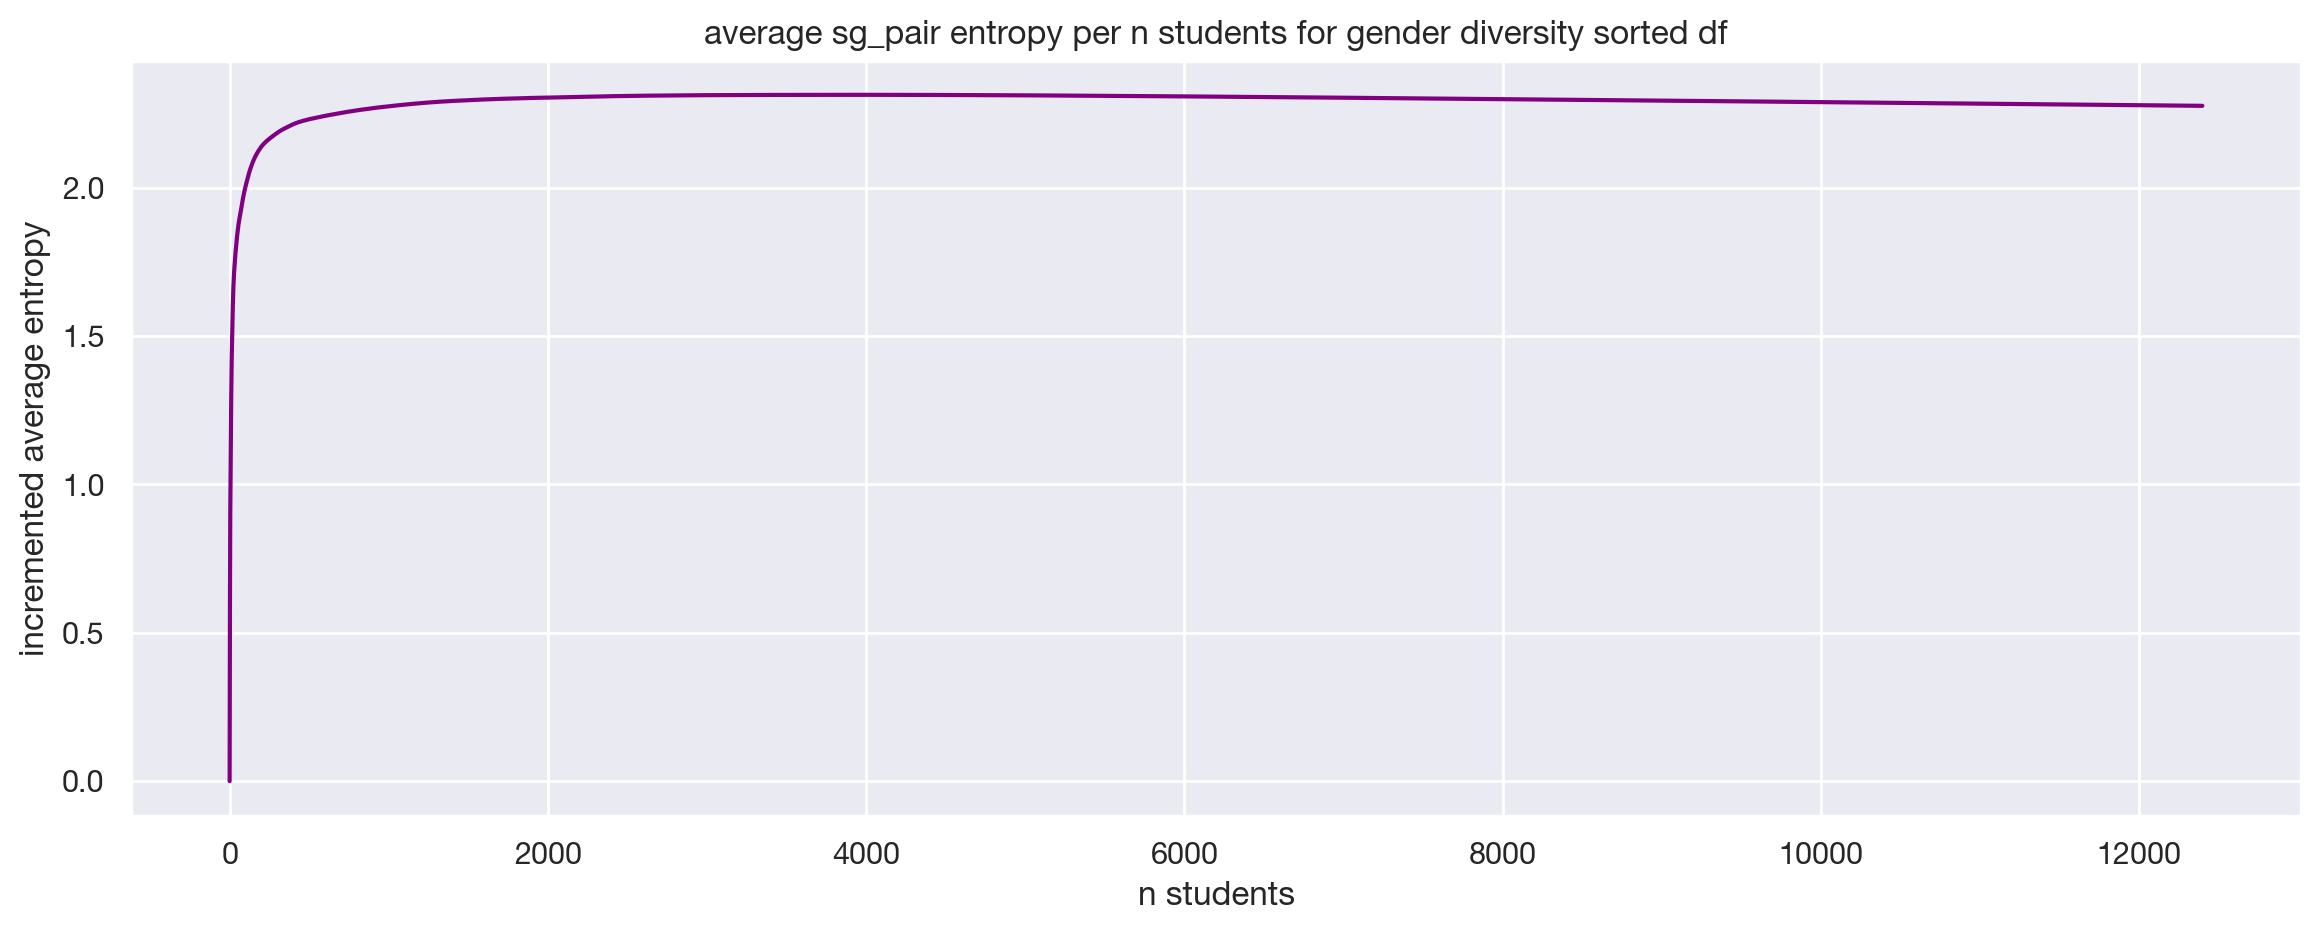

In [624]:
#ENTROPY sg_pair gender_sort

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy", data=gender_df, color="purple").set_title("average sg_pair entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.show()

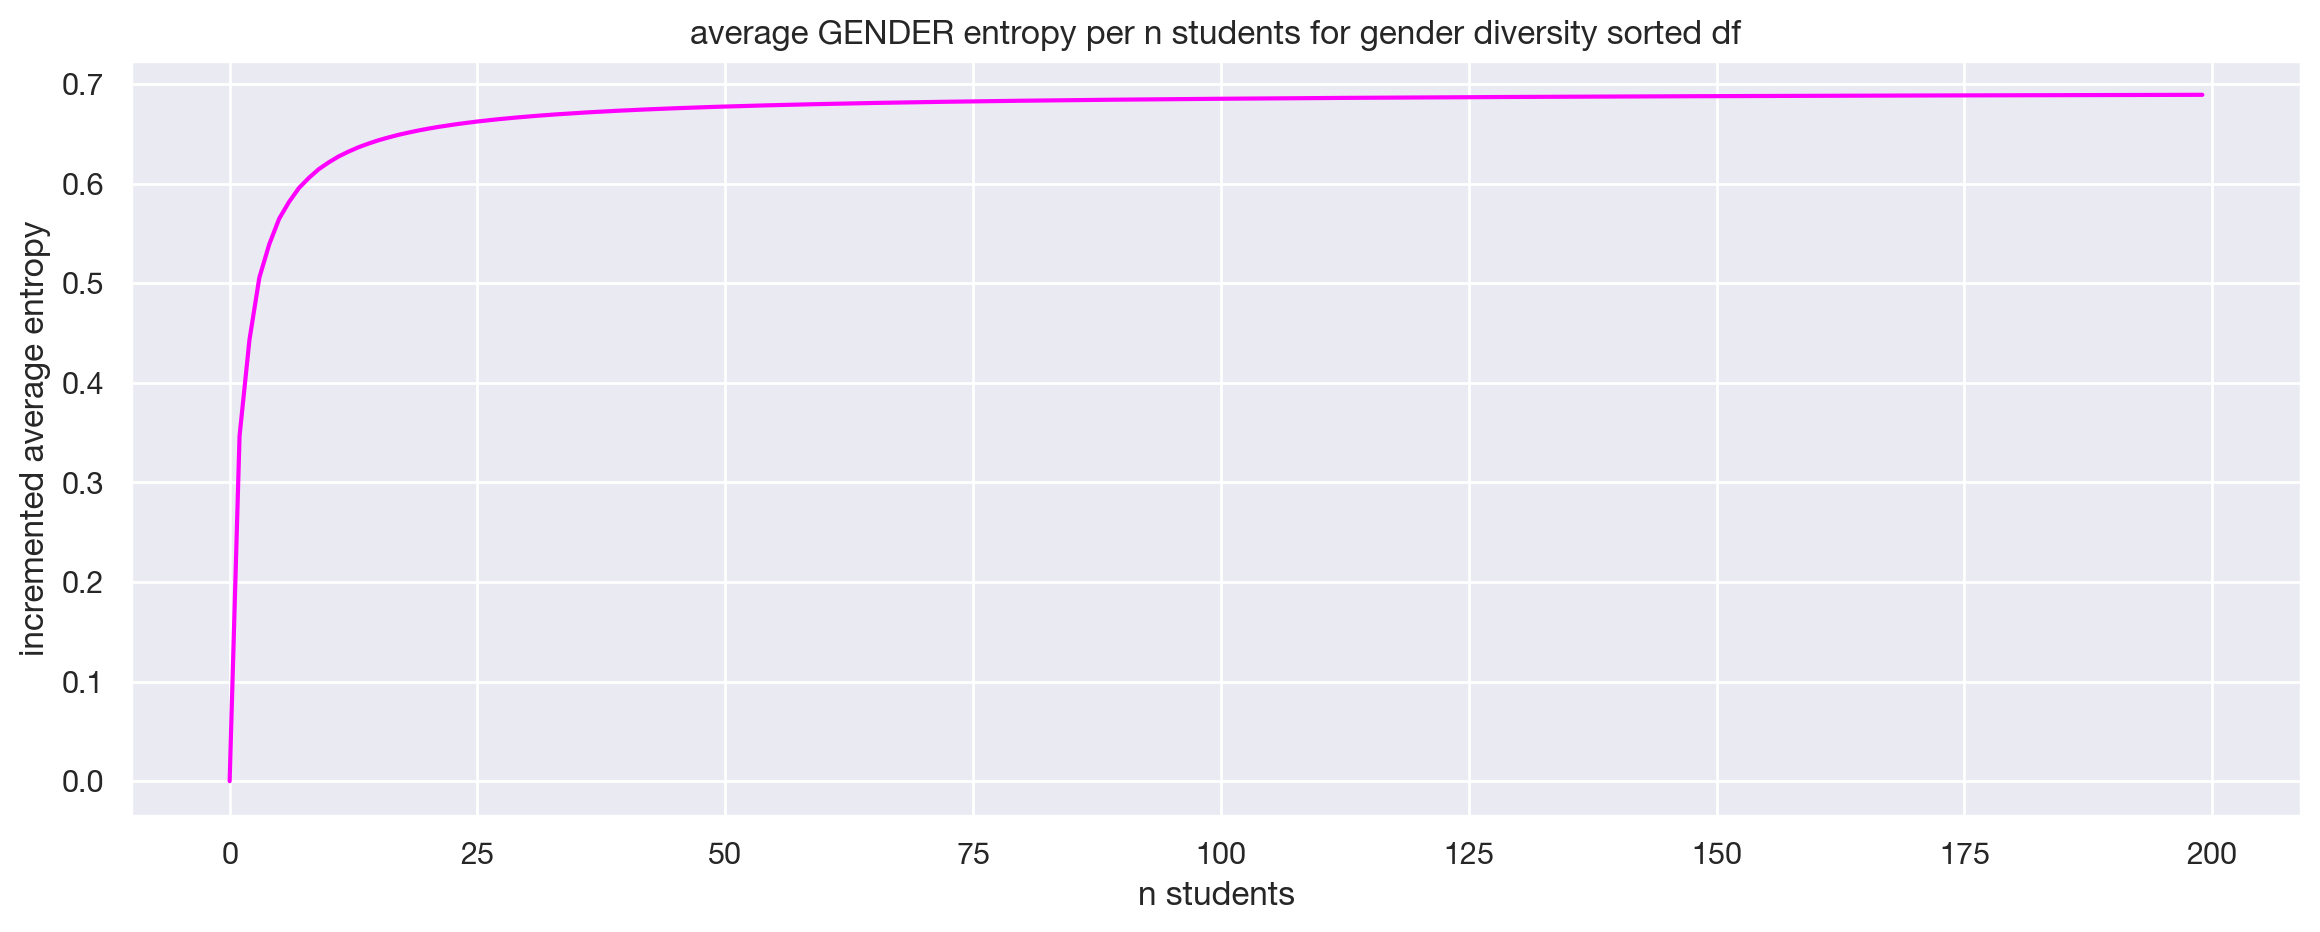

In [638]:
#ENTROPY GENDER gender_sort

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=gender_df[:200], color="magenta").set_title("average GENDER entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.show()

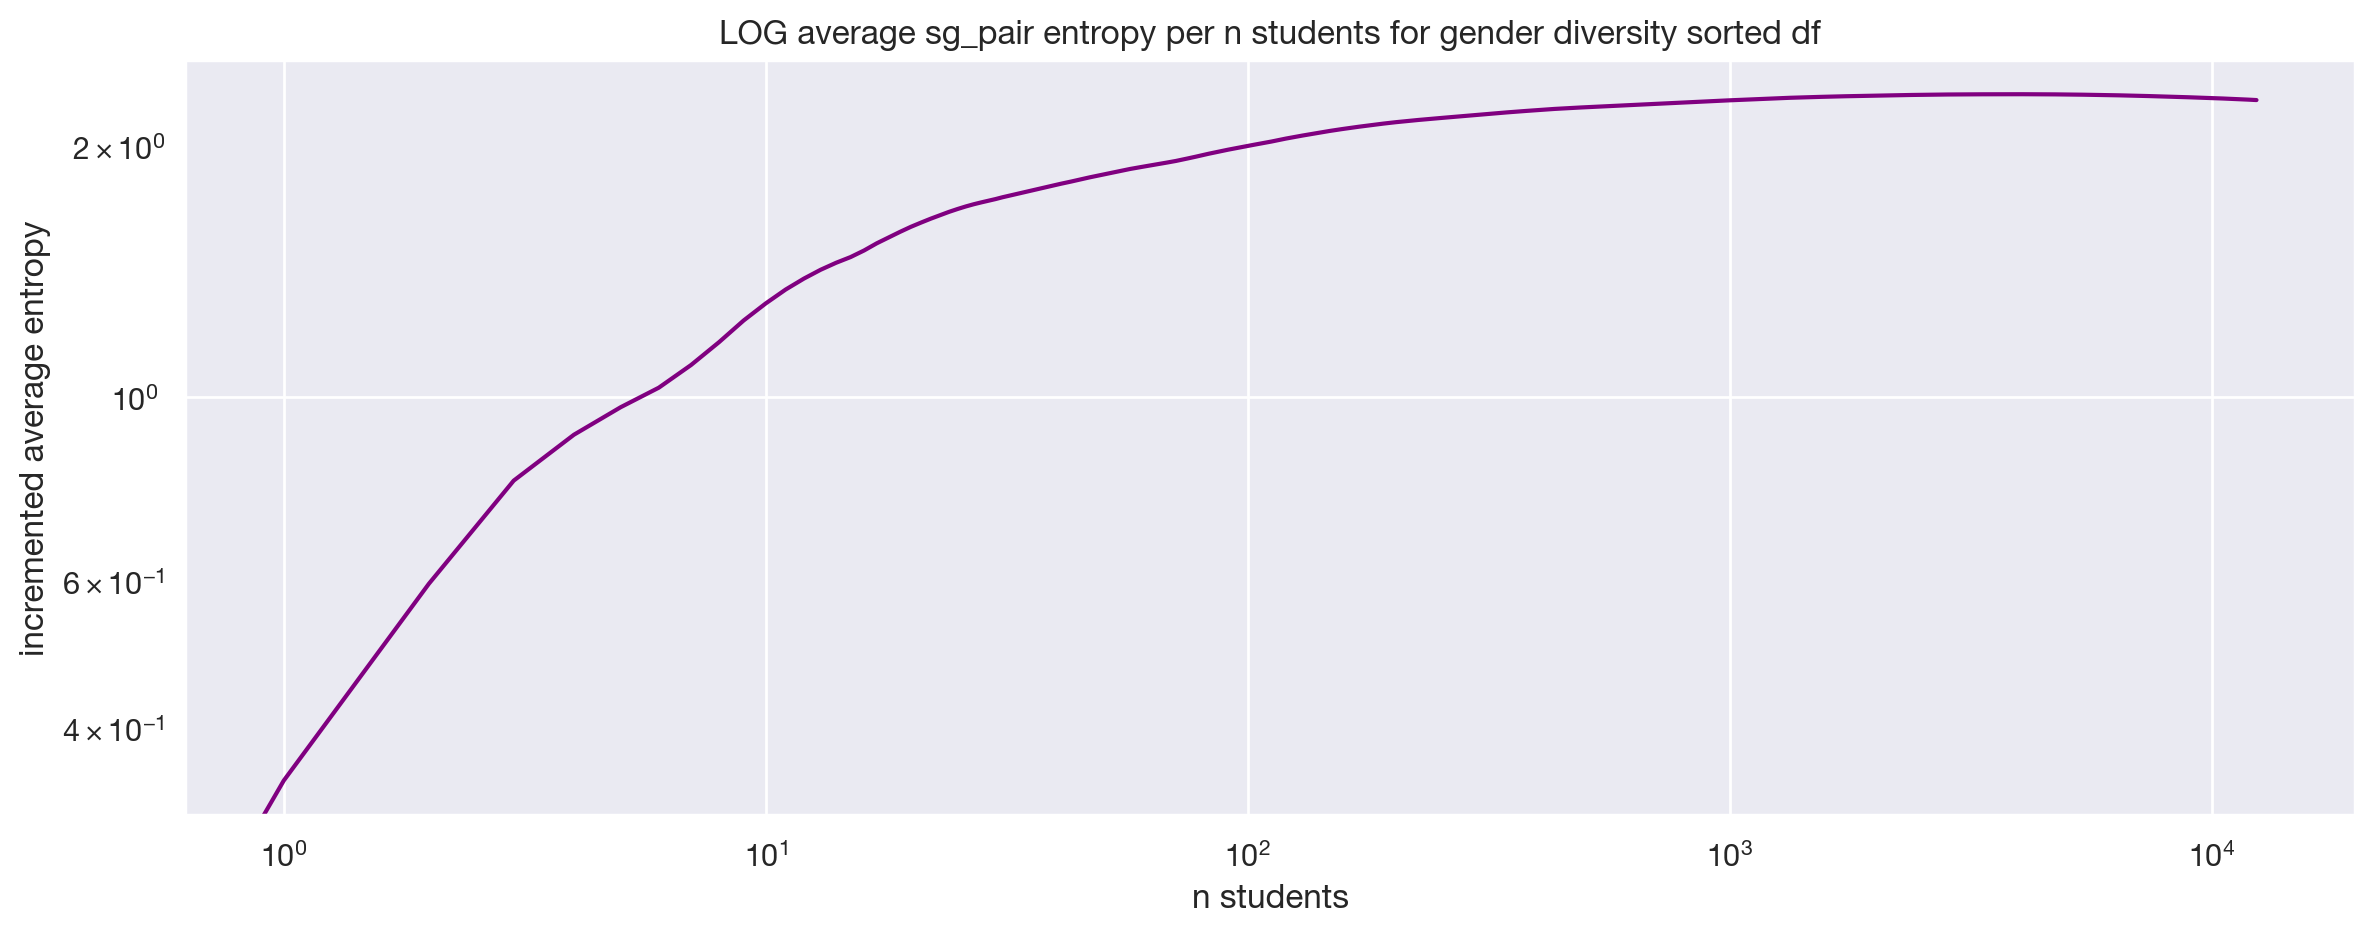

In [630]:
#LOG Plot of the average incremental entropy as function of n

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy", data=gender_df, color="sky").set_title("LOG average sg_pair entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.yscale("log") #optional
plt.xscale("log") #optional 
plt.show()


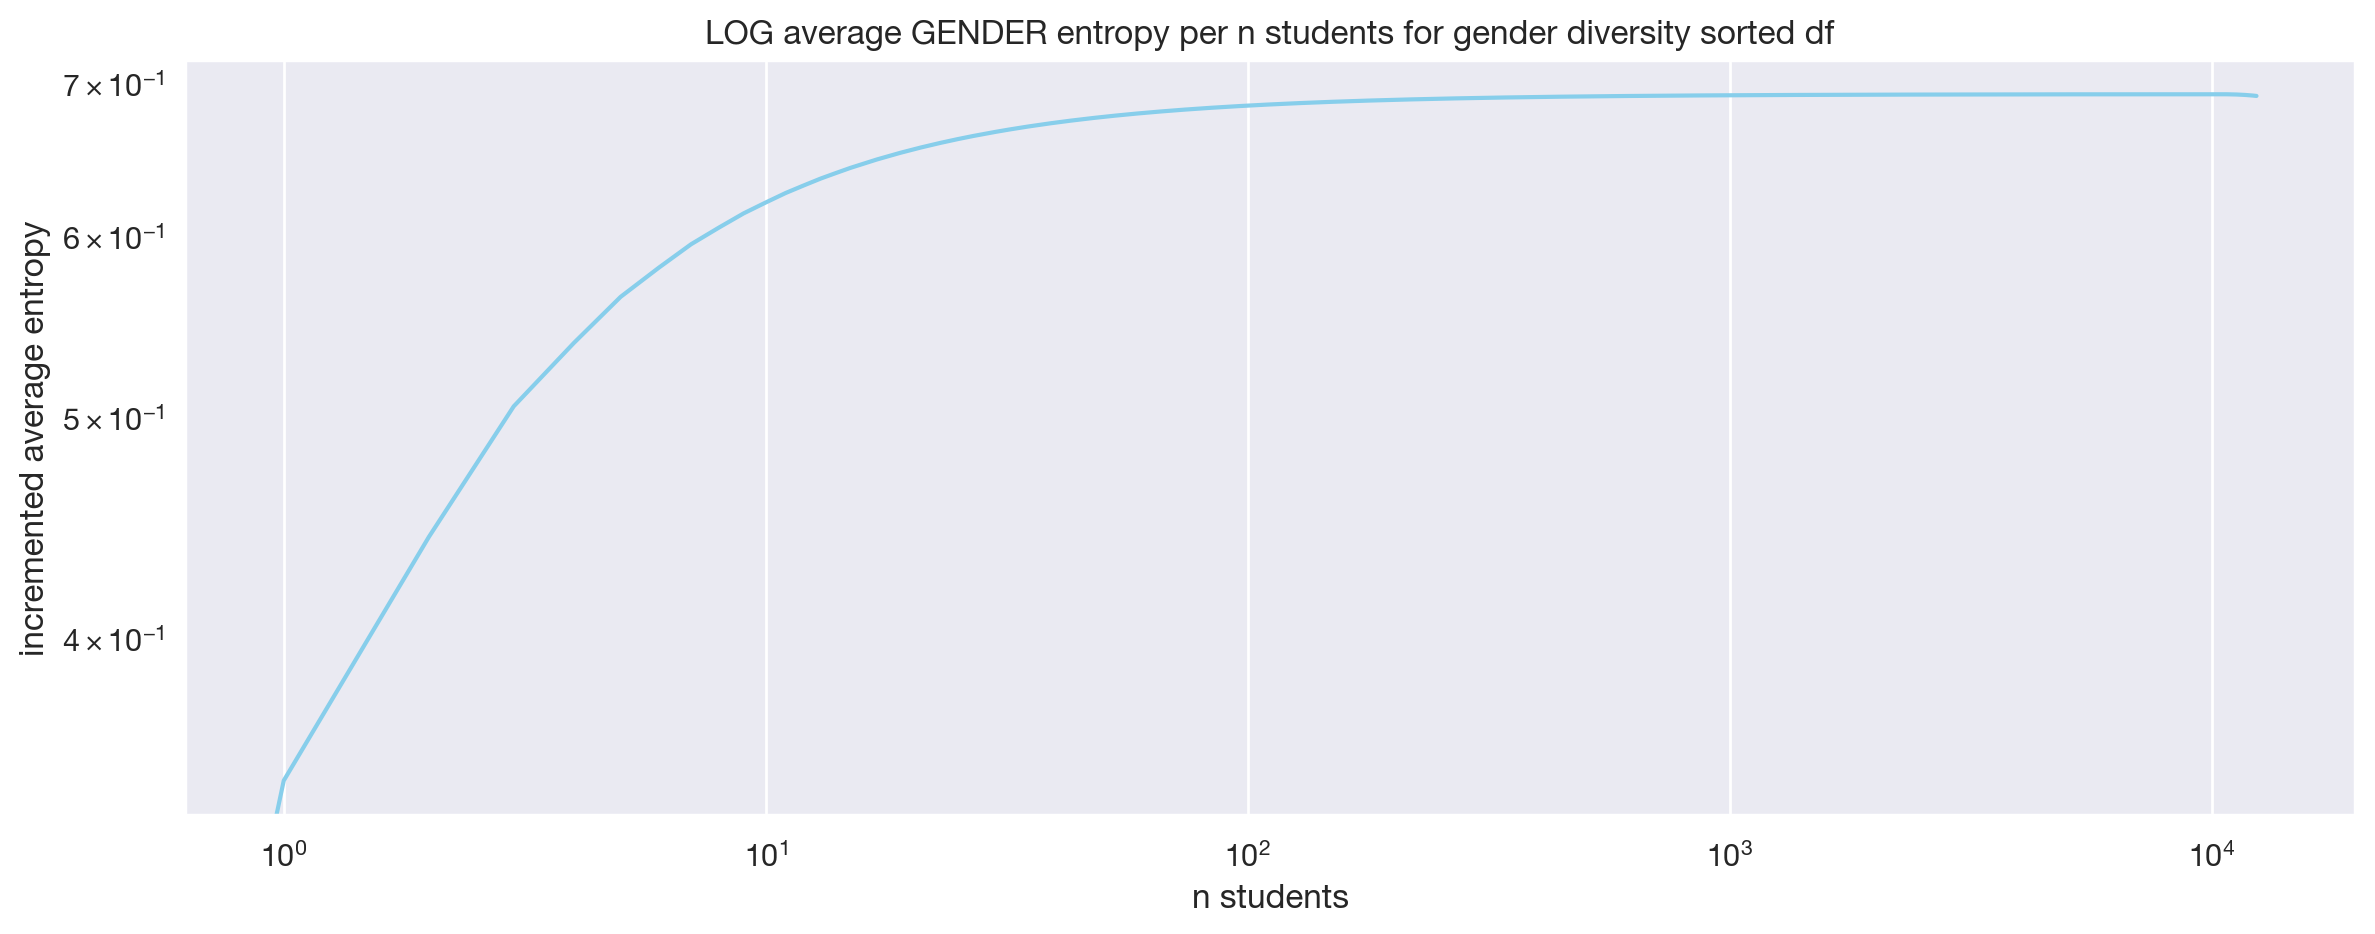

In [637]:
#Plot the average incremental entropy as function of n

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=gender_df, color="skyblue").set_title("LOG average GENDER entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.yscale("log") #optional
plt.xscale("log") #optional
plt.show()

In [ ]:
#Plot the average incremental entropy as function of n

gender_df["n_students"] = range(len(gender_df))

# Look of single lineplot of mergesort grades as function of n
sns.lineplot(x="n_students", y="incr_entropy_GENDER", data=gender_df, color="purple").set_title("average GENDER entropy per n students for gender diversity sorted df")
plt.xlabel('n students')
plt.ylabel('incremented average entropy')
plt.show()

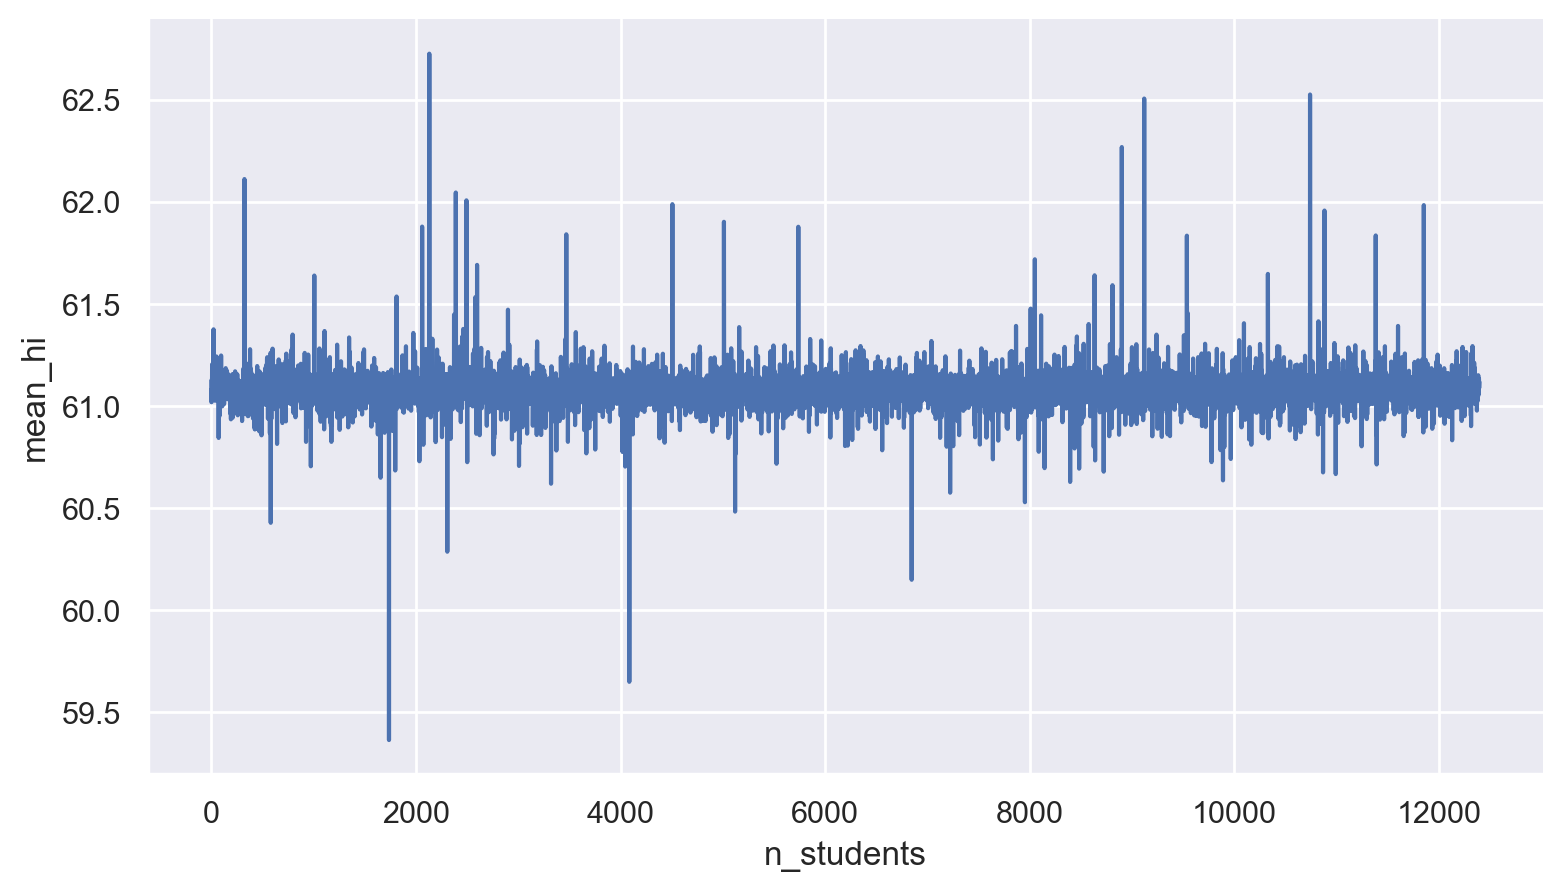

In [100]:
# prøv først at plot ét line plot: average grade som funktion af n
# Draw seaborn lineplot with error band based on the standard deviation
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=df_use_new, x="n_students", y="mean_hi")
sns.despine()
plt.show()